# obliczenie ceny mieszkania za 5 lat

In [1]:
import numpy as np

freq = 12
rate = 0.05
years = 5
pv1 = 120000

rate /= freq  # konwersja stopy do okresu miesięcznego
nper = years * freq  # liczba wszystkich okresów
periods = np.arange(1,nper+1,dtype=int)
np.set_printoptions(suppress=True)

flat_price = np.zeros(nper)
for i in flat_price: 
    y = list(flat_price).index(i)
    if y > 0:
        x = y-1
        flat_price[y] = (i+flat_price[x]) * (1+rate)
    else: 
        flat_price[y] = pv1
flat_price = np.around(flat_price,2)
print(flat_price)
pv = flat_price[59]
print(f"Przybliżona cena mieszkania po 5 latach to {pv}")

[120000.   120500.   121002.08 121506.26 122012.53 122520.92 123031.42
 123544.06 124058.82 124575.73 125094.8  125616.03 126139.43 126665.01
 127192.78 127722.75 128254.93 128789.32 129325.95 129864.8  130405.91
 130949.26 131494.89 132042.78 132592.96 133145.43 133700.2  134257.29
 134816.69 135378.43 135942.51 136508.93 137077.72 137648.88 138222.41
 138798.34 139376.67 139957.4  140540.56 141126.15 141714.17 142304.65
 142897.58 143492.99 144090.88 144691.26 145294.14 145899.53 146507.44
 147117.89 147730.88 148346.43 148964.54 149585.22 150208.49 150834.36
 151462.84 152093.93 152727.66 153364.02]
Przybliżona cena mieszkania po 5 latach to 153364.02


# obliczenie kwot wpłacanych na lokatę

In [2]:
principal_decreasing = np.around(np.zeros(nper)+(pv/nper),2)
principal_decreasing[:10]
print(f"Miesięcznie powinno wpływać {principal_decreasing[0]} zł")

Miesięcznie powinno wpływać 2556.07 zł


In [18]:
balance = np.zeros(nper) + pv
balance_close = np.around(balance - np.cumsum(principal_decreasing),2)
balance_close

array([150807.95, 148251.88, 145695.81, 143139.74, 140583.67, 138027.6 ,
       135471.53, 132915.46, 130359.39, 127803.32, 125247.25, 122691.18,
       120135.11, 117579.04, 115022.97, 112466.9 , 109910.83, 107354.76,
       104798.69, 102242.62,  99686.55,  97130.48,  94574.41,  92018.34,
        89462.27,  86906.2 ,  84350.13,  81794.06,  79237.99,  76681.92,
        74125.85,  71569.78,  69013.71,  66457.64,  63901.57,  61345.5 ,
        58789.43,  56233.36,  53677.29,  51121.22,  48565.15,  46009.08,
        43453.01,  40896.94,  38340.87,  35784.8 ,  33228.73,  30672.66,
        28116.59,  25560.52,  23004.45,  20448.38,  17892.31,  15336.24,
        12780.17,  10224.1 ,   7668.03,   5111.96,   2555.89,     -0.18])

In [19]:
rate = 0.12
rate /= freq

interest = (balance_close * (rate+1))-balance_close
interest

array([1508.0795, 1482.5188, 1456.9581, 1431.3974, 1405.8367, 1380.276 ,
       1354.7153, 1329.1546, 1303.5939, 1278.0332, 1252.4725, 1226.9118,
       1201.3511, 1175.7904, 1150.2297, 1124.669 , 1099.1083, 1073.5476,
       1047.9869, 1022.4262,  996.8655,  971.3048,  945.7441,  920.1834,
        894.6227,  869.062 ,  843.5013,  817.9406,  792.3799,  766.8192,
        741.2585,  715.6978,  690.1371,  664.5764,  639.0157,  613.455 ,
        587.8943,  562.3336,  536.7729,  511.2122,  485.6515,  460.0908,
        434.5301,  408.9694,  383.4087,  357.848 ,  332.2873,  306.7266,
        281.1659,  255.6052,  230.0445,  204.4838,  178.9231,  153.3624,
        127.8017,  102.241 ,   76.6803,   51.1196,   25.5589,   -0.0018])

In [20]:
self_contribution = principal_decreasing - interest
self_contribution = np.sort(self_contribution)[::-1]
self_contribution

array([2556.0718, 2530.5111, 2504.9504, 2479.3897, 2453.829 , 2428.2683,
       2402.7076, 2377.1469, 2351.5862, 2326.0255, 2300.4648, 2274.9041,
       2249.3434, 2223.7827, 2198.222 , 2172.6613, 2147.1006, 2121.5399,
       2095.9792, 2070.4185, 2044.8578, 2019.2971, 1993.7364, 1968.1757,
       1942.615 , 1917.0543, 1891.4936, 1865.9329, 1840.3722, 1814.8115,
       1789.2508, 1763.6901, 1738.1294, 1712.5687, 1687.008 , 1661.4473,
       1635.8866, 1610.3259, 1584.7652, 1559.2045, 1533.6438, 1508.0831,
       1482.5224, 1456.9617, 1431.401 , 1405.8403, 1380.2796, 1354.7189,
       1329.1582, 1303.5975, 1278.0368, 1252.4761, 1226.9154, 1201.3547,
       1175.794 , 1150.2333, 1124.6726, 1099.1119, 1073.5512, 1047.9905])

# sprawdzenie

In [21]:
check = np.arange(nper)
for i in self_contribution: 
    y = list(self_contribution).index(i)
    if y > 0:
        x = y-1
        check[y] = (i+check[x]) * (rate+1)
    else: 
        check[y] = i * 1.01
print(check)
a = check[59] - pv
print(f"Kwota otrzymana w ten sposób na lokacie jest o {np.round(a,2)} większa od przewidywanej")

[  2581   5162   7743  10324  12905  15486  18067  20648  23229  25810
  28391  30972  33553  36134  38715  41296  43877  46458  49039  51620
  54201  56782  59363  61944  64525  67106  69687  72268  74849  77430
  80011  82592  85173  87754  90335  92916  95497  98078 100659 103240
 105821 108402 110983 113564 116145 118726 121307 123888 126469 129050
 131631 134212 136793 139374 141955 144536 147117 149698 152279 154860]
Kwota otrzymana w ten sposób na lokacie jest o 1495.98 większa od przewidywanej


# wykres

Text(0, 0.5, 'Wartość')

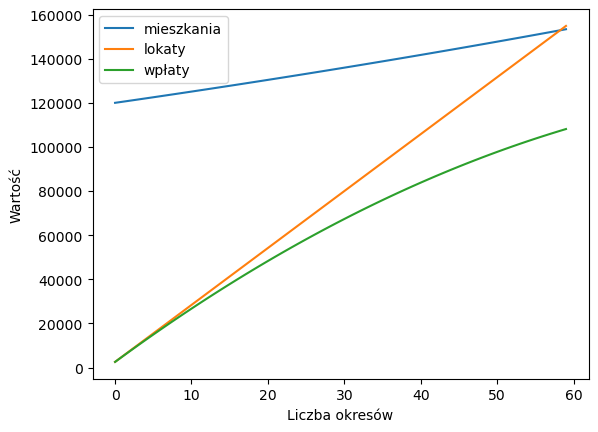

In [22]:
import matplotlib.pyplot as plt

plt.plot(flat_price,label='mieszkania')
plt.plot(check,label='lokaty')
plt.plot(np.cumsum(self_contribution),label='wpłaty')
plt.legend()
plt.xlabel("Liczba okresów")
plt.ylabel("Wartość")